In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
df = pd.read_csv('D:\Makeen\ProjectML\SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [22]:
print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count())
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [23]:
X = df[1].values
y = df[0].values

In [24]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [25]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [26]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)

In [27]:
X_train_raw

array(['Still in customer place', 'how are you? I miss you!',
       "Where are the garage keys? They aren't on the bookshelf", ...,
       'Hey j! r u feeling any better, hopeSo hunny. i amnow feelin ill & ithink i may have tonsolitusaswell! damn iam layin in bedreal bored. lotsof luv me xxxx',
       'The evo. I just had to download flash. Jealous?',
       'UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise of£2000 CASH 18+only. To opt out txt X to 07786200117'],
      dtype=object)

TFIDF works by proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present. Hence, words like 'this', 'are' etc., that are commonly present in all the documents are not given a very high rank.

In [28]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [18]:
X_train

<4179x7481 sparse matrix of type '<class 'numpy.float64'>'
	with 55487 stored elements in Compressed Sparse Row format>

In [11]:
vectorizer

TfidfVectorizer()

In [30]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [42]:
print(classifier.fit(X_train, y_train))

LogisticRegression()


In [32]:
predictions = classifier.predict(X_test)

In [41]:
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


In [33]:
for i, prediction in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s --- ture label: %s' % (prediction, X_test_raw[i], y_test[i]))

Predicted: ham, message: LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms --- ture label: spam
Predicted: ham, message: Good morning, my Love ... I go to sleep now and wish you a great day full of feeling better and opportunity ... You are my last thought babe, I LOVE YOU *kiss* --- ture label: ham
Predicted: ham, message: We r outside already. --- ture label: ham
Predicted: ham, message: Moji i love you more than words. Have a rich day --- ture label: ham
Predicted: ham, message: You know what hook up means right? --- ture label: ham


# Some debug codes :) 

In [34]:
X_test[1, 2150]

0.0

In [35]:
np.where(X_test[1].todense() != 0)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64),
 array([ 935, 1019, 1151, 1284, 2100, 2720, 2949, 3067, 3088, 3133, 3805,
        3874, 4073, 4428, 4502, 4672, 4713, 4779, 5981, 6608, 6677, 7259,
        7423], dtype=int64))

In [36]:
x = vectorizer.transform([X_test_raw[0]]).todense()

In [39]:
x

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
np.where(x != 0)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=int64),
 array([ 935, 1246, 1568, 2520, 2855, 2863, 2952, 3005, 3133, 3243, 3517,
        3631, 3947, 4148, 4244, 4474, 4586, 4757, 6024, 6121, 6597, 6785,
        6906, 7295, 7423], dtype=int64))

In [38]:
vectorizer.inverse_transform(np.array(x))

[array(['and', 'been', 'came', 'enjoy', 'for', 'forget', 'fun', 'gbp',
        'great', 'has', 'in', 'it', 'life', 'made', 'me', 'much', 'never',
        'one', 'sms', 'special', 'this', 'truly', 'until', 'won', 'you'],
       dtype='<U34')]

[[4 1]
 [2 3]]


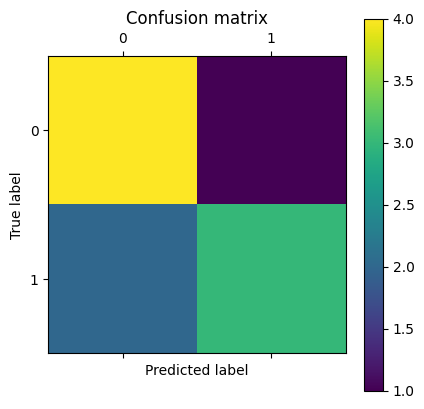

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

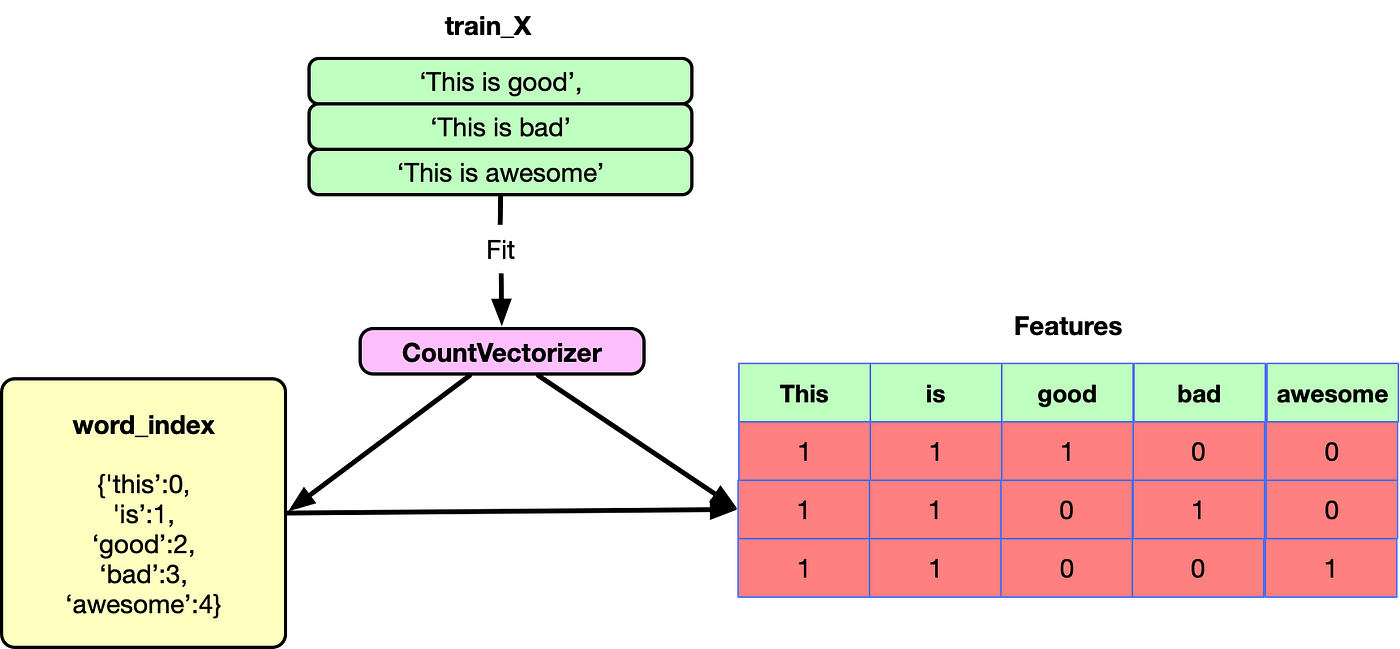